## 3 Computing Tf-Idf and Cosine similarity

Now is your turn to work in the session task.

The idea is to program a script that given two document paths obtains their ids, computes the Tf-Idf representation of the documents and then computes and prints their cosine similarity

**Follow the instructions** in the documentation and and **pay attention** to the documentation that you have to deliver for this session.

In [1]:
#%pip install elasticsearch
#%pip install elasticsearch-dsl
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn

In [2]:
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
from elasticsearch import Elasticsearch
from elasticsearch_dsl import Index, analyzer, tokenizer
import pandas as pd
from TFIDFViewer import TFIDFViewer
from IndexFilesPreprocess import IndexFiles
import os

In [3]:
client = Elasticsearch(hosts=['http://localhost:9200'], request_timeout=1000)

We will experiment with all 3 sets of docs.

In [4]:
# Indexar cada conjunto de documentos
novels_indexer = IndexFiles(client, 'novels_index');
novels_indexer.index_files(f'{os.getcwd()}/novels');

arxiv_indexer = IndexFiles(client, 'arxiv_abs_index');
arxiv_indexer.index_files(f'{os.getcwd()}/arxiv_abs');

newsgroups_indexer = IndexFiles(client, 'newsgroups_index');
newsgroups_indexer.index_files(f'{os.getcwd()}/20_newsgroups');


Indexando 33 archivos
Leyendo archivos...


/Users/nico/Desktop/UPC/CAIM/.venv/lib/python3.12/site-packages/elasticsearch_dsl/_sync/index.py:314: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  return self._get_connection(using).indices.delete(index=self._name, **kwargs)
/Users/nico/Desktop/UPC/CAIM/.venv/lib/python3.12/site-packages/elasticsearch_dsl/_sync/index.py:170: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  return self._get_connection(using).indices.create(
/Users/nico/Desktop/UPC/CAIM/.venv/lib/python3.12/site-packages/elasticsearch_dsl/_sync/index.py:303: ElasticsearchWarning: Elasticsearch bui

Configuraciones del índice: {'novels_index': {'settings': {'index': {'routing': {'allocation': {'include': {'_tier_preference': 'data_content'}}}, 'number_of_shards': '1', 'provided_name': 'novels_index', 'creation_date': '1729069469846', 'analysis': {'analyzer': {'default': {'filter': ['lowercase'], 'type': 'custom', 'tokenizer': 'standard'}}}, 'number_of_replicas': '1', 'uuid': 'jHiDH9INTTWl6tuQDVu5tg', 'version': {'created': '7170499'}}}}}
Indexando documentos...


/Users/nico/Desktop/UPC/CAIM/Lab/Lab2/IndexFilesPreprocess.py:91: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  bulk(self.client, ldocs)


Indexando 55760 archivos
Leyendo archivos...
Configuraciones del índice: {'arxiv_abs_index': {'settings': {'index': {'routing': {'allocation': {'include': {'_tier_preference': 'data_content'}}}, 'number_of_shards': '1', 'provided_name': 'arxiv_abs_index', 'creation_date': '1729069476918', 'analysis': {'analyzer': {'default': {'filter': ['lowercase'], 'type': 'custom', 'tokenizer': 'standard'}}}, 'number_of_replicas': '1', 'uuid': 'hz06ojWOR7C294JwY70XiA', 'version': {'created': '7170499'}}}}}
Indexando documentos...
Indexando 20089 archivos
Leyendo archivos...
Configuraciones del índice: {'newsgroups_index': {'settings': {'index': {'routing': {'allocation': {'include': {'_tier_preference': 'data_content'}}}, 'number_of_shards': '1', 'provided_name': 'newsgroups_index', 'creation_date': '1729069484025', 'analysis': {'analyzer': {'default': {'filter': ['lowercase'], 'type': 'custom', 'tokenizer': 'standard'}}}, 'number_of_replicas': '1', 'uuid': '0R78wIx_SAuBymmq_gIDrw', 'version': {'cre

In [5]:
viewer = TFIDFViewer(client)


### Experimentación

Comprobaremos la similitud de un documento consigo mismo para ver que logicamente obtenemos un 1.0.

In [6]:
novels_paths = novels_indexer.get_indexed_paths()

similarity = viewer.compare_files('novels_index',novels_paths[0],'novels_index' ,novels_paths[0]);
print(f"Similitud del documento consigo mismo: {similarity:3.5f}")


Similitud del documento consigo mismo: 1.00000


/Users/nico/Desktop/UPC/CAIM/Lab/Lab2/IndexFilesPreprocess.py:99: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  s = self.client.search(index=self.index, body={
/Users/nico/Desktop/UPC/CAIM/.venv/lib/python3.12/site-packages/elasticsearch_dsl/_sync/search.py:88: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  es.search(index=self._index, body=self.to_dict(), **self._params)
/Users/nico/Desktop/UPC/CAIM/Lab/Lab2/TFIDFViewer.py:46: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessibl

Compara la similitud entre varios documentos del mismo conjunto de datos, por ejemplo, dentro de `20_newsgroups`

In [7]:
newsgroups_paths = newsgroups_indexer.get_indexed_paths()

similarity_intra = viewer.compare_files('newsgroups_index',newsgroups_paths[0], 'newsgroups_index',newsgroups_paths[1])
print(f"Similitud entre dos documentos del mismo subgrupo: {similarity_intra}")


Similitud entre dos documentos del mismo subgrupo: 0.01617963083427974


Compara documentos de diferentes subgrupos dentro de 20_newsgroups

In [8]:
similarity_intra = viewer.compare_files('newsgroups_index',newsgroups_paths[0],'newsgroups_index' , newsgroups_paths[len(newsgroups_paths)-1])
print(f"Similitud entre dos documentos del mismo subgrupo: {similarity_intra}")

Similitud entre dos documentos del mismo subgrupo: 0.0012991952211394804


Compara documentos entre diferentes corpus, en este caso `novels` and `arxiv_abs`(scientific)

In [9]:
arxiv_paths = arxiv_indexer.get_indexed_paths()

similarity_novels_arxiv = viewer.compare_files('novels_index',novels_paths[0],'arxiv_abs_index', arxiv_paths[0])
print(f"Similitud entre un documento de novels y arxiv_abs: {similarity_novels_arxiv}")


Similitud entre un documento de novels y arxiv_abs: 0.004492267947440333


Comparativa final

In [10]:
# Obtener una lista de rutas de documentos de cada conjunto
novels_paths = novels_indexer.get_indexed_paths()[:5]
arxiv_paths = arxiv_indexer.get_indexed_paths()[:5]
newsgroups_paths = newsgroups_indexer.get_indexed_paths()[:5]


In [23]:
tfidf_viewer = TFIDFViewer(client)

# Crear la matriz de similitud para Newsgroups
similarity_matrix_newsgroups = []
for i in range(len(newsgroups_paths)):
    row = []
    for j in range(len(newsgroups_paths)):
        sim = tfidf_viewer.compare_files('newsgroups_index', newsgroups_paths[i], 'newsgroups_index', newsgroups_paths[j])
        row.append(sim)
    similarity_matrix_newsgroups.append(row)

df_newsgroups = pd.DataFrame(similarity_matrix_newsgroups, columns=range(len(newsgroups_paths)), index=range(len(newsgroups_paths)))

# Crear la matriz de similitud para Novels
similarity_matrix_novels = []
for i in range(len(novels_paths)):
    row = []
    for j in range(len(novels_paths)):
        sim = tfidf_viewer.compare_files('novels_index', novels_paths[i], 'novels_index', novels_paths[j])
        row.append(sim)
    similarity_matrix_novels.append(row)

df_novels = pd.DataFrame(similarity_matrix_novels, columns=range(len(novels_paths)), index=range(len(novels_paths)))

# Crear la matriz de similitud para Arxiv
similarity_matrix_arxiv = []
for i in range(len(arxiv_paths)):
    row = []
    for j in range(len(arxiv_paths)):
        sim = tfidf_viewer.compare_files('arxiv_abs_index', arxiv_paths[i], 'arxiv_abs_index', arxiv_paths[j])
        row.append(sim)
    similarity_matrix_arxiv.append(row)

df_arxiv = pd.DataFrame(similarity_matrix_arxiv, columns=range(len(arxiv_paths)), index=range(len(arxiv_paths)))

similarity_matrix_docs = []
docs_indexer = IndexFiles(client, 'docs')
docs_paths = docs_indexer.get_indexed_paths()[:5]
for i in range(len(novels_paths)):
    row = []
    for j in range(len(arxiv_paths)):
        sim = tfidf_viewer.compare_files('docs', docs_paths[i], 'docs', docs_paths[j])
        row.append(sim)
    similarity_matrix_docs.append(row)


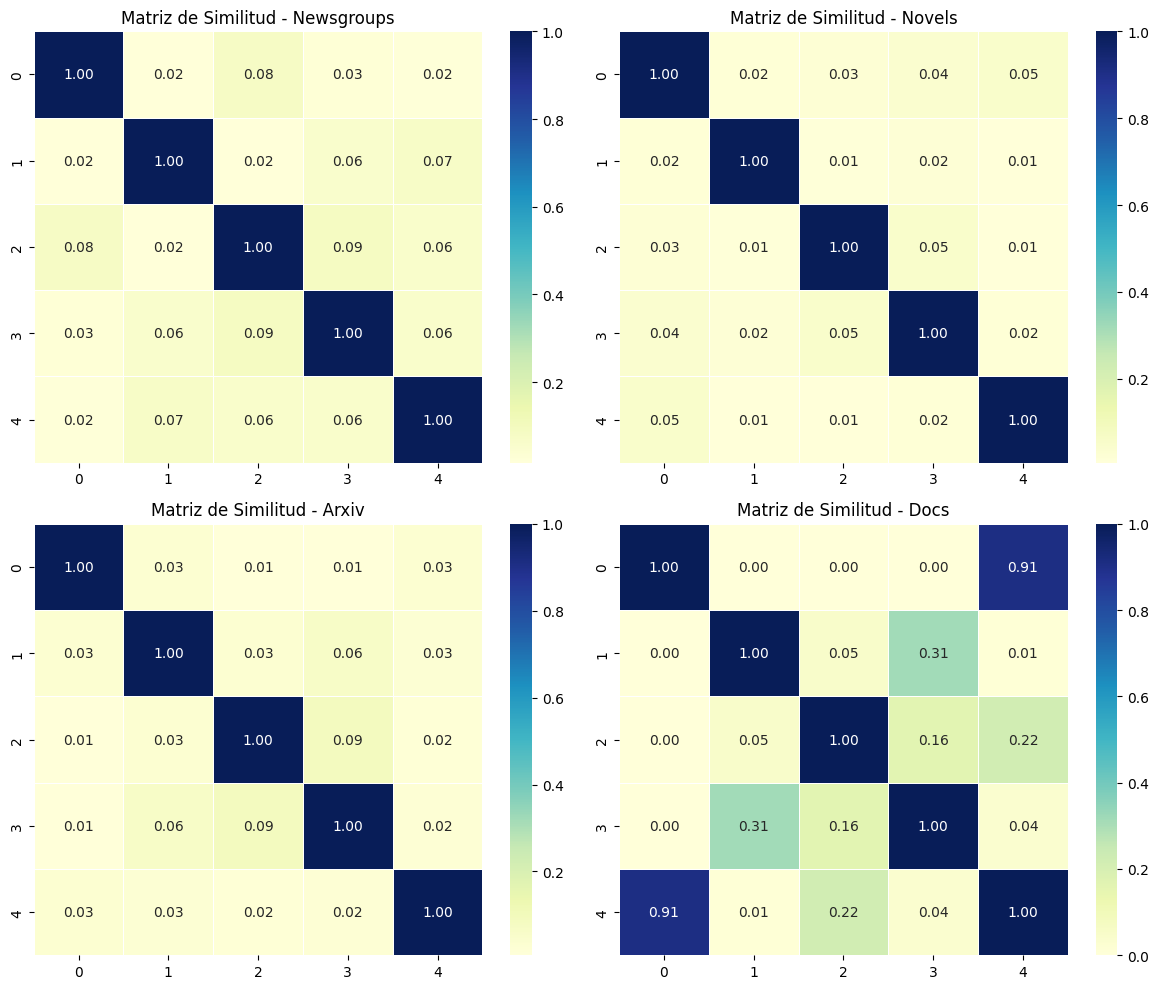

In [26]:
plt.figure(figsize=(12, 10))

# Heatmap para Newsgroups
plt.subplot(2, 2, 1)
sns.heatmap(df_newsgroups, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Similitud - Newsgroups')

# Heatmap para Novels
plt.subplot(2, 2, 2)
sns.heatmap(df_novels, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Similitud - Novels')

# Heatmap para Arxiv
plt.subplot(2, 2, 3)
sns.heatmap(df_arxiv, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Similitud - Arxiv')

# Heatmap para Docs
plt.subplot(2, 2, 4)
sns.heatmap(similarity_matrix_docs, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Similitud - Docs')

plt.tight_layout()
plt.show()